In [1]:
import argparse
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yaml
import os
from boruta import BorutaPy
from dtreeviz.trees import dtreeviz
import graphviz
import sklearn
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.metrics import accuracy_score,f1_score, roc_curve, roc_auc_score
import statistics
from sklearn import preprocessing
import re

In [2]:
def parse_args():
    parser = argparse.ArgumentParser()
    
    
    parser.add_argument('--name', default="test1",
                        help='model name: (default: arch+timestamp)')
    
    #parameter for training and validation 
    """
    Note:To keep the comparison conditions the same for this study, 
    each fold within the cross-validation of the GCN and Randam forest will be the same patient.
    To achieve this, cross-validation is performed using the patient id for each fold generated by GCN_SHS_AI_with_featimp_wristE.ipynb. 
    For this reason, it is recommended to run this RF program after the analysis using GCN_SHS_AI_with_featimp_wristE.ipynb first.
    """
    parser.add_argument('--num_fold', default=5, type=int,
                        help='number of folding for cross validation')

    #dataset
    """
    The data frame has id in the first column, objective variable in the second column, 
    and explanatory variables in the third and subsequent columns
    """
    parser.add_argument('--file_name', default='demo_df',
                        help='file name')
    
    parser.add_argument('--id_dir', default=None,
                        help='directory including patients id for cross validation')
    
    #hyper parameter for random forest 
    parser.add_argument('--n_estimators', default='[i for i in range(100,500,50)]',
                        help='number of estimators')    
    parser.add_argument('--class_weight', default=['balanced'],
                        help='class_weight')
    parser.add_argument('--criterion', default=["gini"],
                        help='criterion')
    parser.add_argument('--max_depth', default='[i for i in range(3,6,1)]',
                        help='max_depth')
    parser.add_argument('--random_state', default=[1],
                        help='random_state')
    parser.add_argument('--max_features', default=["log2", "sqrt"],
                        help='max_features')
    parser.add_argument('--min_samples_split', default='[i for i in range(3,5,1)]',
                        help='min_samples_split')
    parser.add_argument('--max_leaf_nodes', default='[i for i in range(4,6,1)]',
                        help='max_leaf_nodes')

    #Hyper param for Boruta
    parser.add_argument('--max_iter', default=800, type=int,
                        help='max iteration for boruta')
    
    parser.add_argument('--perc', default=70, type=int,
                        help='perc number for boruta')

#==================================================================================

    config = parser.parse_args(
        args=['--file_name', 'wrist_erosion_1503', 
              '--n_estimators', f'{[i for i in range(20,200,40)]}',
              '--num_fold', '10',
              '--id_dir', 'SHS_AI_wristE_s0.1_d0.6_final',
              '--name', 'SHS_NET_wrist_erosion'   
             ])

    return config
config = vars(parse_args())

--------------------
name: SHS_NET_wrist_erosion
num_fold: 10
file_name: wrist_erosion_1503
id_dir: SHS_AI_wristE_s0.1_d0.6_final
n_estimators: [20, 60, 100, 140, 180]
class_weight: ['balanced']
criterion: ['gini']
max_depth: [i for i in range(3,6,1)]
random_state: [1]
max_features: ['log2', 'sqrt']
min_samples_split: [i for i in range(3,5,1)]
max_leaf_nodes: [i for i in range(4,6,1)]
max_iter: 800
perc: 70
--------------------
objective variable:  both_wrist_Erosion_diff_per_date
====evaluation for training====
AUC	0.702
F1	0.288
====parameters of the predictor=====
[('bootstrap', True), ('ccp_alpha', 0.0), ('class_weight', 'balanced'), ('criterion', 'gini'), ('max_depth', 3), ('max_features', 'log2'), ('max_leaf_nodes', 5), ('max_samples', None), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 1), ('min_samples_split', 3), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 20), ('n_jobs', None), ('oob_score', False), ('random_state', 1), ('verbose', 0), ('warm_start', False)]
=

C:\Users\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


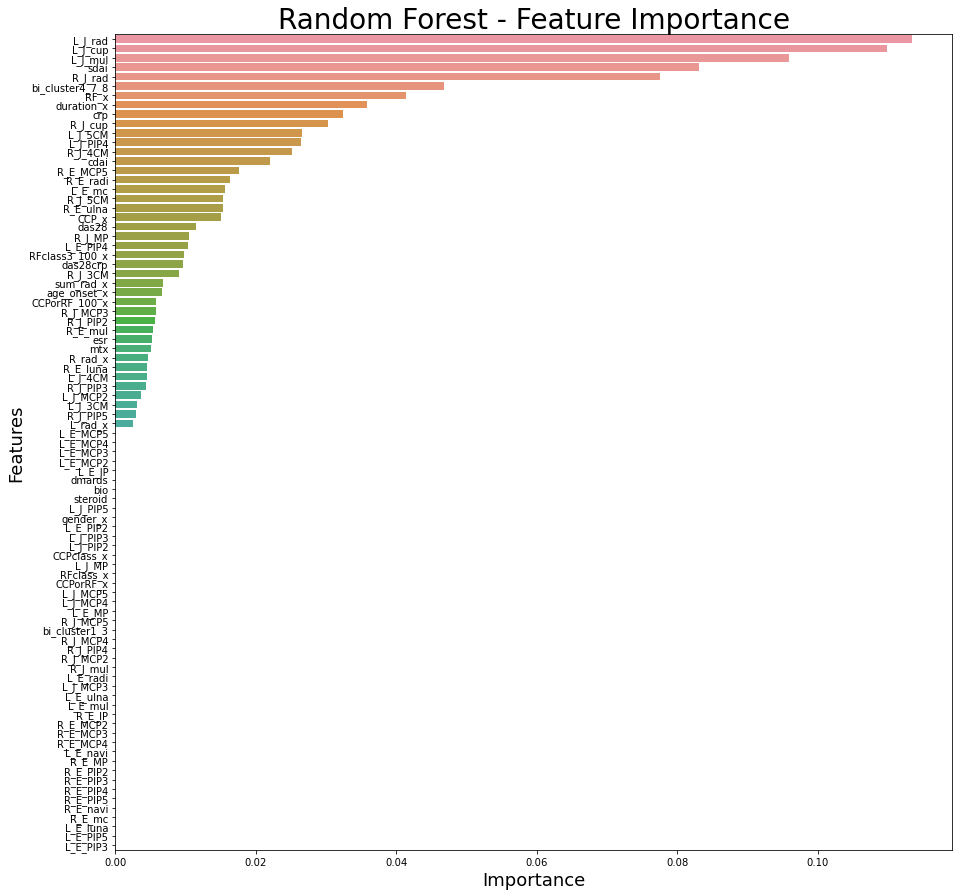

====evaluation for validation====
AUC	0.700
F1	0.281
====evaluation for training====
AUC	0.733
F1	0.315
====parameters of the predictor=====
[('bootstrap', True), ('ccp_alpha', 0.0), ('class_weight', 'balanced'), ('criterion', 'gini'), ('max_depth', 4), ('max_features', 'log2'), ('max_leaf_nodes', 5), ('max_samples', None), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 1), ('min_samples_split', 3), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 20), ('n_jobs', None), ('oob_score', False), ('random_state', 1), ('verbose', 0), ('warm_start', False)]
====feature importance=====
         imp       col
9   0.132636   L_J_cup
10  0.107964   L_J_mul
11  0.091955   L_J_rad
66  0.052560       crp
64  0.044550     das28
..       ...       ...
47  0.000000  R_E_MCP2
48  0.000000  R_E_MCP3
49  0.000000  R_E_MCP4
52  0.000000  R_E_PIP2
86  0.000000   R_rad_x

[87 rows x 2 columns]


C:\Users\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


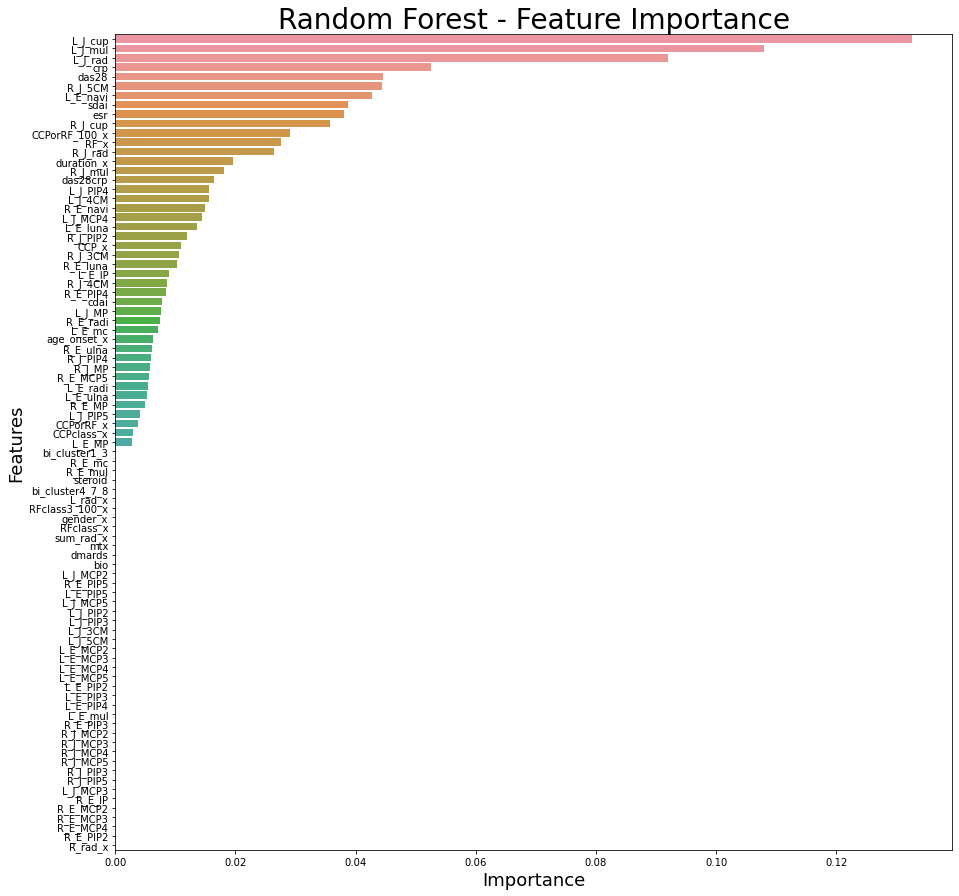

====evaluation for validation====
AUC	0.626
F1	0.215
====evaluation for training====
AUC	0.738
F1	0.301
====parameters of the predictor=====
[('bootstrap', True), ('ccp_alpha', 0.0), ('class_weight', 'balanced'), ('criterion', 'gini'), ('max_depth', 3), ('max_features', 'sqrt'), ('max_leaf_nodes', 5), ('max_samples', None), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 1), ('min_samples_split', 3), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 20), ('n_jobs', None), ('oob_score', False), ('random_state', 1), ('verbose', 0), ('warm_start', False)]
====feature importance=====
         imp              col
10  0.103325          L_J_mul
63  0.096741  bi_cluster4_7_8
11  0.081666          L_J_rad
64  0.060784            das28
9   0.059335          L_J_cup
..       ...              ...
53  0.000000         R_E_PIP3
54  0.000000         R_E_PIP4
55  0.000000         R_E_PIP5
56  0.000000         R_E_luna
0   0.000000         L_J_MCP2

[87 rows x 2 columns]


C:\Users\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


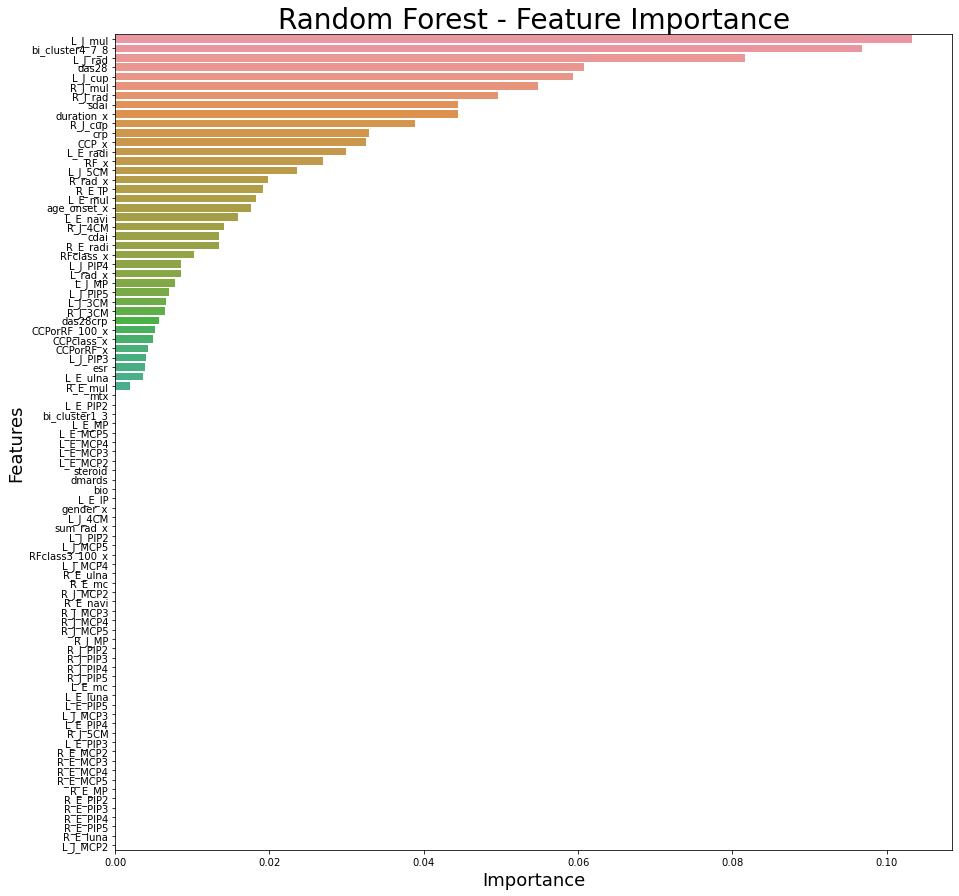

====evaluation for validation====
AUC	0.657
F1	0.286
====evaluation for training====
AUC	0.738
F1	0.333
====parameters of the predictor=====
[('bootstrap', True), ('ccp_alpha', 0.0), ('class_weight', 'balanced'), ('criterion', 'gini'), ('max_depth', 3), ('max_features', 'log2'), ('max_leaf_nodes', 5), ('max_samples', None), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 1), ('min_samples_split', 3), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 20), ('n_jobs', None), ('oob_score', False), ('random_state', 1), ('verbose', 0), ('warm_start', False)]
====feature importance=====
         imp       col
10  0.127191   L_J_mul
9   0.103887   L_J_cup
66  0.094064       crp
11  0.069267   L_J_rad
42  0.065496   R_J_rad
..       ...       ...
47  0.000000  R_E_MCP2
48  0.000000  R_E_MCP3
49  0.000000  R_E_MCP4
50  0.000000  R_E_MCP5
43  0.000000   R_J_3CM

[87 rows x 2 columns]


C:\Users\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


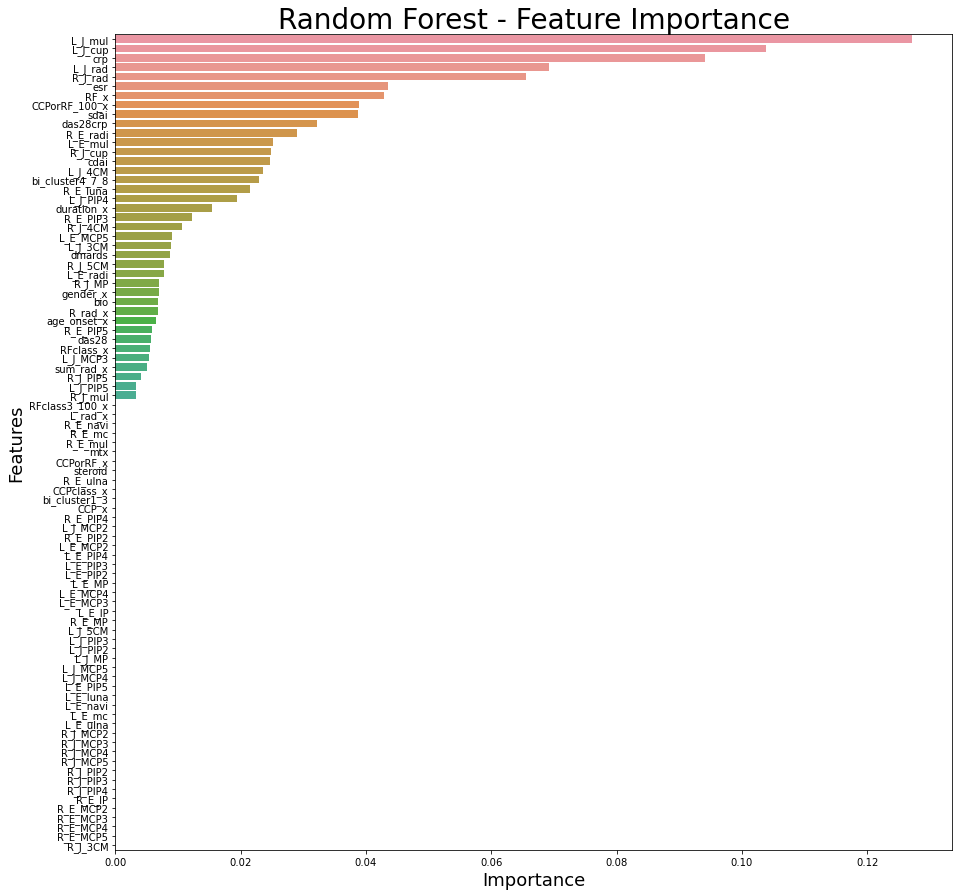

====evaluation for validation====
AUC	0.652
F1	0.269
====evaluation for training====
AUC	0.729
F1	0.307
====parameters of the predictor=====
[('bootstrap', True), ('ccp_alpha', 0.0), ('class_weight', 'balanced'), ('criterion', 'gini'), ('max_depth', 4), ('max_features', 'log2'), ('max_leaf_nodes', 5), ('max_samples', None), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 1), ('min_samples_split', 3), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 20), ('n_jobs', None), ('oob_score', False), ('random_state', 1), ('verbose', 0), ('warm_start', False)]
====feature importance=====
         imp            col
9   0.125405        L_J_cup
10  0.103613        L_J_mul
11  0.076253        L_J_rad
66  0.065894            crp
67  0.048842            esr
..       ...            ...
30  0.000000       L_E_radi
29  0.000000       L_E_ulna
28  0.000000        L_E_mul
59  0.000000        R_E_mul
62  0.000000  bi_cluster1_3

[87 rows x 2 columns]


C:\Users\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


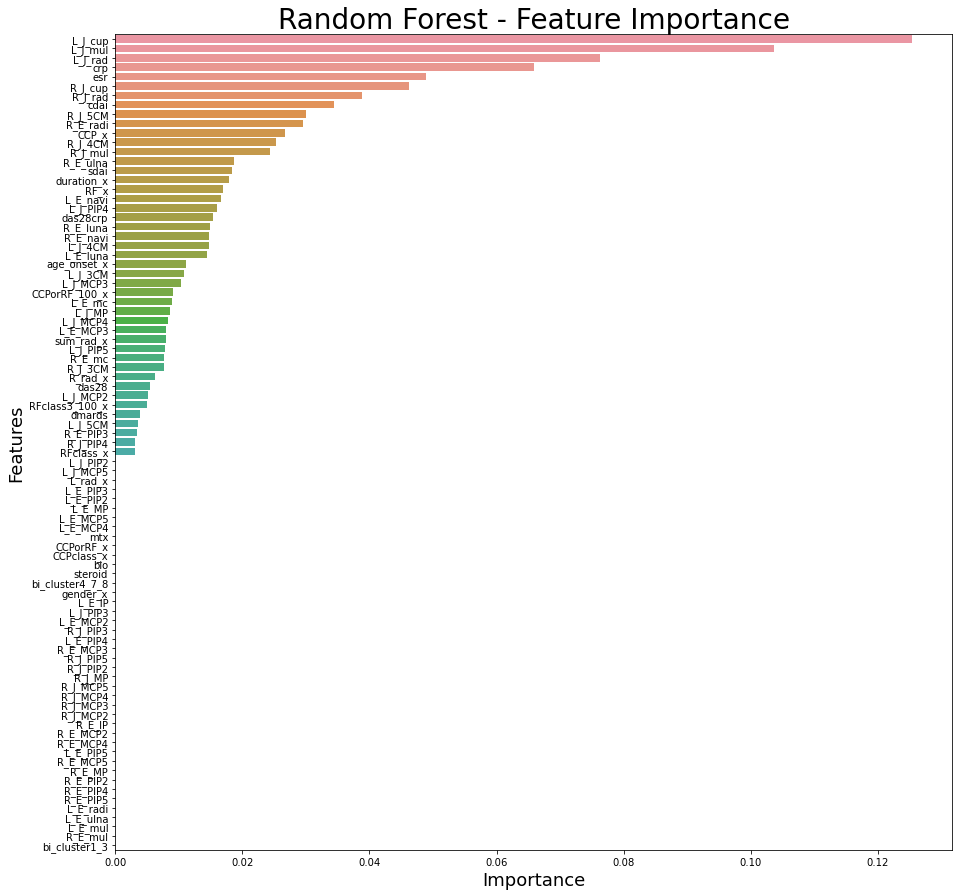

====evaluation for validation====
AUC	0.689
F1	0.226
====evaluation for training====
AUC	0.721
F1	0.298
====parameters of the predictor=====
[('bootstrap', True), ('ccp_alpha', 0.0), ('class_weight', 'balanced'), ('criterion', 'gini'), ('max_depth', 3), ('max_features', 'log2'), ('max_leaf_nodes', 5), ('max_samples', None), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 1), ('min_samples_split', 3), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 20), ('n_jobs', None), ('oob_score', False), ('random_state', 1), ('verbose', 0), ('warm_start', False)]
====feature importance=====
         imp       col
9   0.122604   L_J_cup
10  0.120950   L_J_mul
42  0.073993   R_J_rad
11  0.060569   L_J_rad
69  0.057768      sdai
..       ...       ...
44  0.000000   R_J_4CM
47  0.000000  R_E_MCP2
49  0.000000  R_E_MCP4
50  0.000000  R_E_MCP5
86  0.000000   R_rad_x

[87 rows x 2 columns]


C:\Users\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


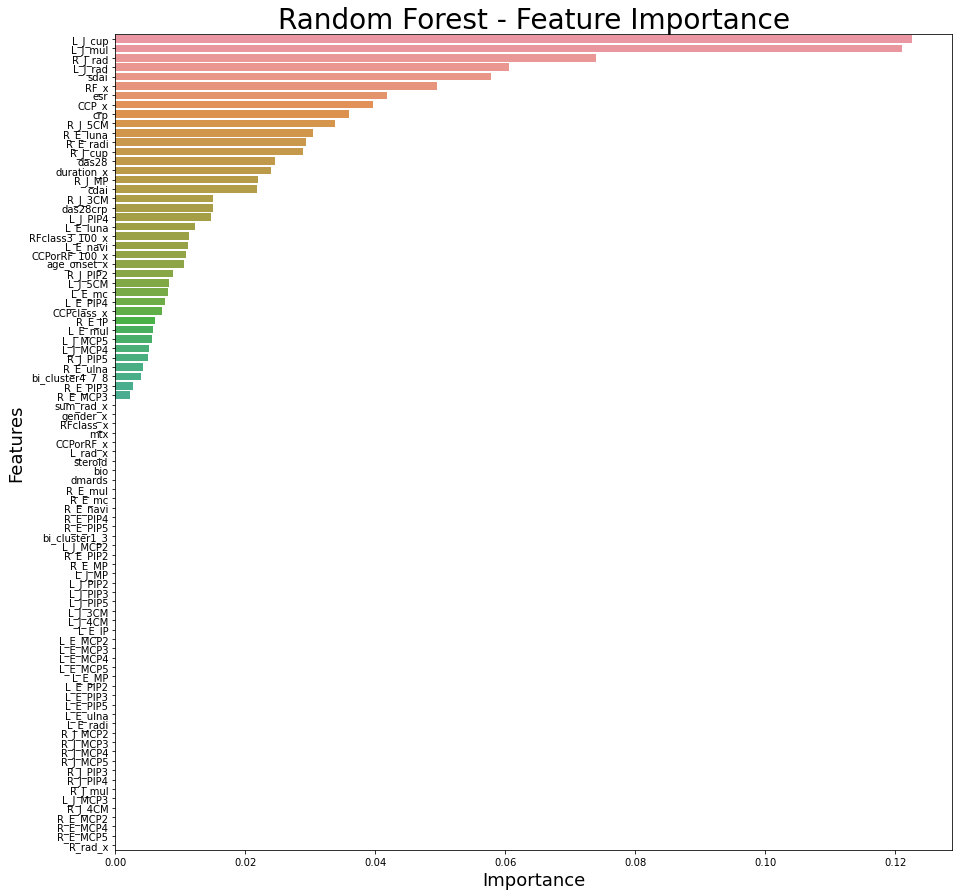

====evaluation for validation====
AUC	0.663
F1	0.286
====evaluation for training====
AUC	0.738
F1	0.306
====parameters of the predictor=====
[('bootstrap', True), ('ccp_alpha', 0.0), ('class_weight', 'balanced'), ('criterion', 'gini'), ('max_depth', 3), ('max_features', 'sqrt'), ('max_leaf_nodes', 5), ('max_samples', None), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 1), ('min_samples_split', 3), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 20), ('n_jobs', None), ('oob_score', False), ('random_state', 1), ('verbose', 0), ('warm_start', False)]
====feature importance=====
         imp              col
63  0.104401  bi_cluster4_7_8
9   0.099233          L_J_cup
11  0.092935          L_J_rad
74  0.064573       duration_x
68  0.048701             cdai
..       ...              ...
1   0.000000         L_J_MCP3
46  0.000000           R_E_IP
48  0.000000         R_E_MCP3
49  0.000000         R_E_MCP4
43  0.000000          R_J_3CM

[87 rows x 2 columns]


C:\Users\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


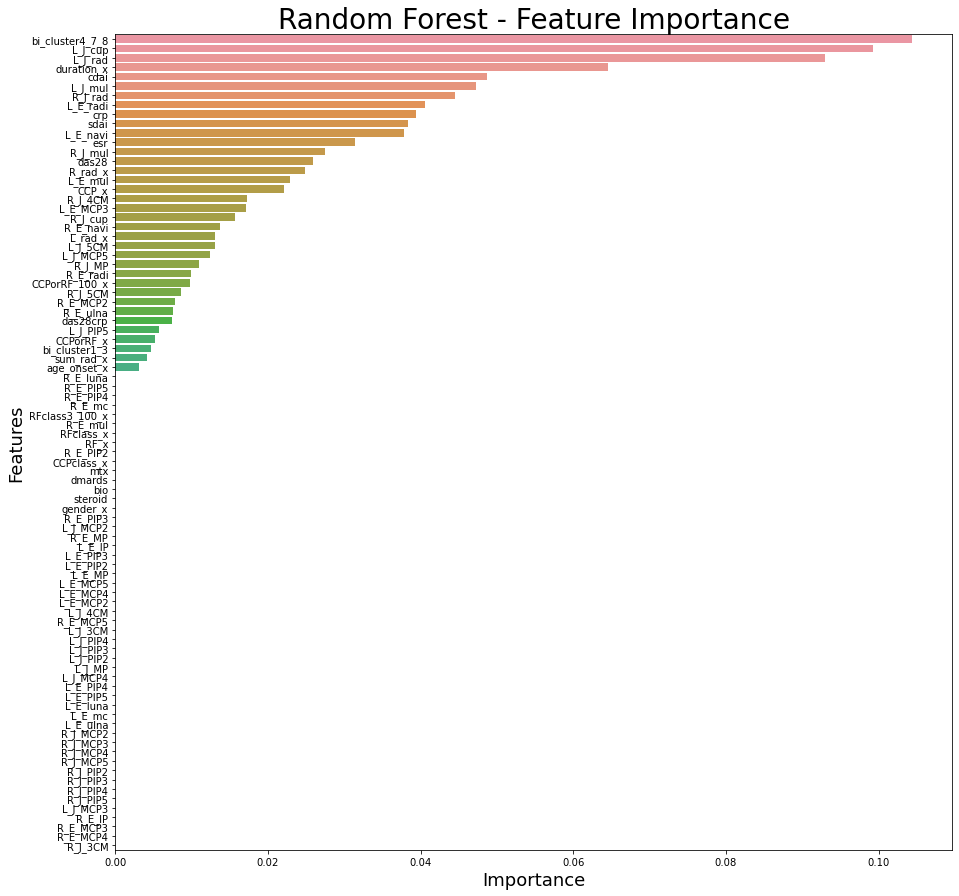

====evaluation for validation====
AUC	0.687
F1	0.319
====evaluation for training====
AUC	0.725
F1	0.297
====parameters of the predictor=====
[('bootstrap', True), ('ccp_alpha', 0.0), ('class_weight', 'balanced'), ('criterion', 'gini'), ('max_depth', 3), ('max_features', 'log2'), ('max_leaf_nodes', 5), ('max_samples', None), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 1), ('min_samples_split', 3), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 20), ('n_jobs', None), ('oob_score', False), ('random_state', 1), ('verbose', 0), ('warm_start', False)]
====feature importance=====
         imp              col
9   0.120560          L_J_cup
11  0.084643          L_J_rad
66  0.071599              crp
42  0.058126          R_J_rad
63  0.051748  bi_cluster4_7_8
..       ...              ...
59  0.000000          R_E_mul
24  0.000000         L_E_PIP5
23  0.000000         L_E_PIP4
62  0.000000    bi_cluster1_3
0   0.000000         L_J_MCP2

[87 rows x 2 columns]


C:\Users\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


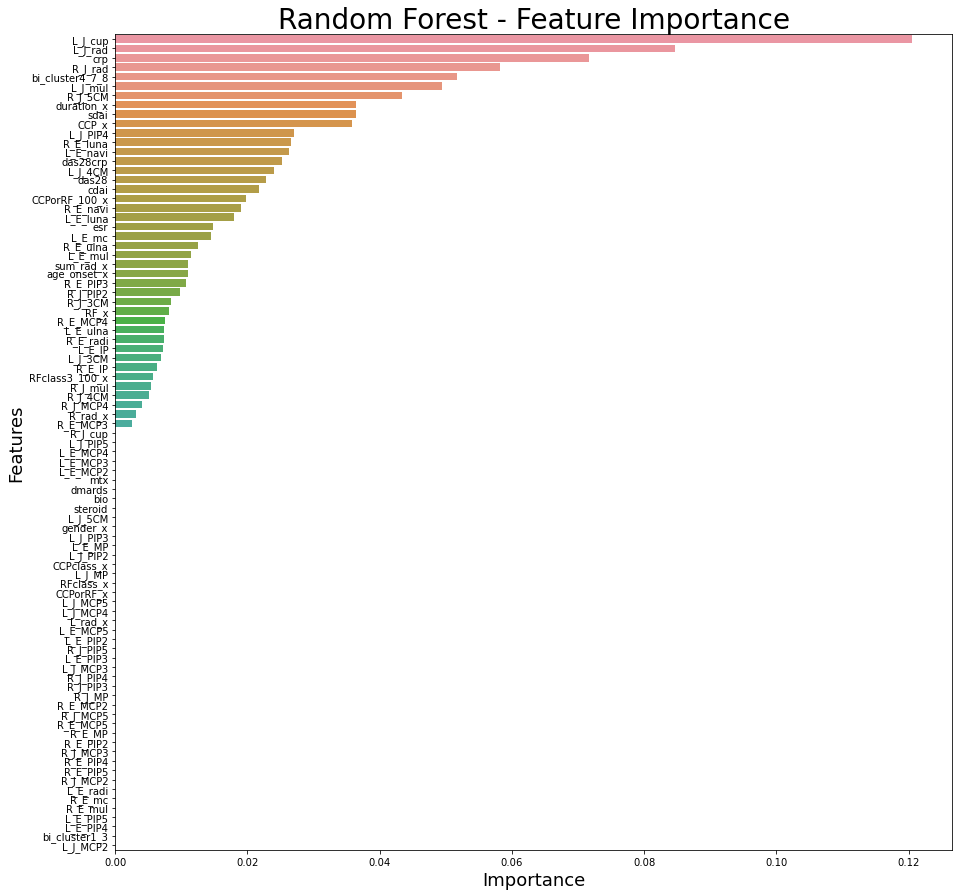

====evaluation for validation====
AUC	0.729
F1	0.358
====evaluation for training====
AUC	0.721
F1	0.305
====parameters of the predictor=====
[('bootstrap', True), ('ccp_alpha', 0.0), ('class_weight', 'balanced'), ('criterion', 'gini'), ('max_depth', 3), ('max_features', 'log2'), ('max_leaf_nodes', 5), ('max_samples', None), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 1), ('min_samples_split', 3), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 20), ('n_jobs', None), ('oob_score', False), ('random_state', 1), ('verbose', 0), ('warm_start', False)]
====feature importance=====
         imp              col
10  0.118279          L_J_mul
11  0.083858          L_J_rad
9   0.075273          L_J_cup
66  0.068437              crp
63  0.049463  bi_cluster4_7_8
..       ...              ...
1   0.000000         L_J_MCP3
46  0.000000           R_E_IP
49  0.000000         R_E_MCP4
51  0.000000           R_E_MP
86  0.000000          R_rad_x

[87 rows x 2 columns]


C:\Users\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


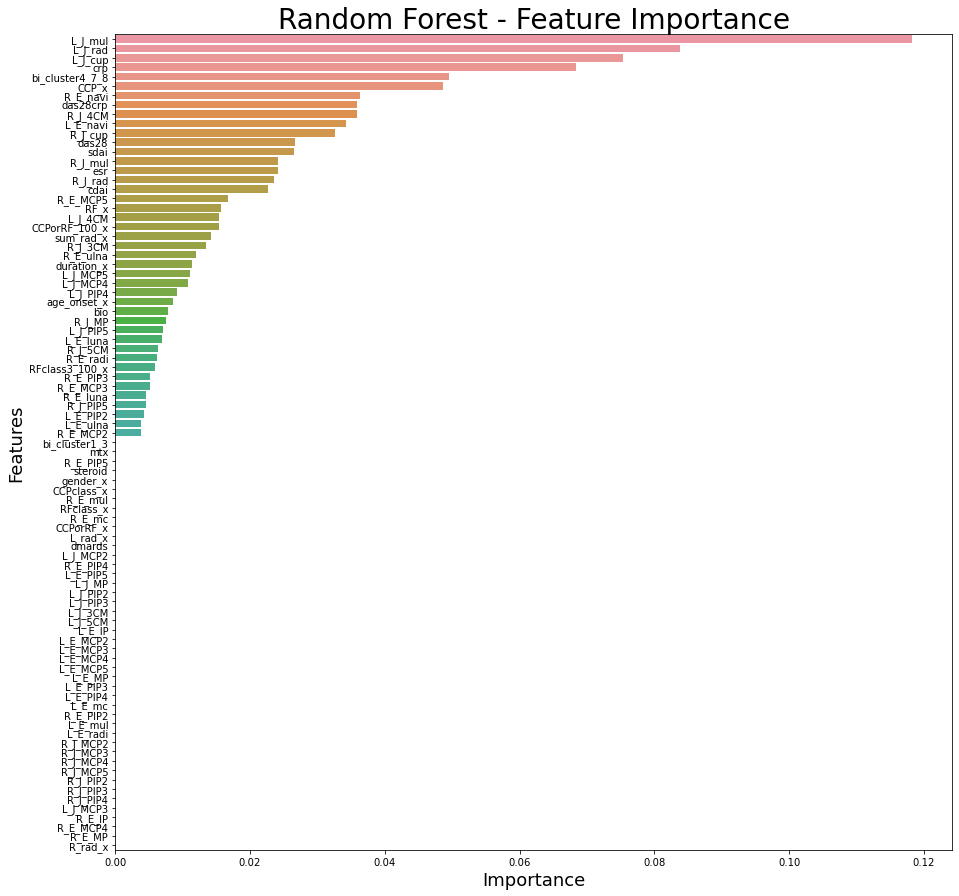

====evaluation for validation====
AUC	0.611
F1	0.174
====evaluation for training====
AUC	0.710
F1	0.293
====parameters of the predictor=====
[('bootstrap', True), ('ccp_alpha', 0.0), ('class_weight', 'balanced'), ('criterion', 'gini'), ('max_depth', 3), ('max_features', 'log2'), ('max_leaf_nodes', 5), ('max_samples', None), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 1), ('min_samples_split', 3), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 20), ('n_jobs', None), ('oob_score', False), ('random_state', 1), ('verbose', 0), ('warm_start', False)]
====feature importance=====
         imp              col
9   0.132502          L_J_cup
10  0.107511          L_J_mul
11  0.106052          L_J_rad
63  0.048107  bi_cluster4_7_8
66  0.047414              crp
..       ...              ...
30  0.000000         L_E_radi
59  0.000000          R_E_mul
60  0.000000         R_E_ulna
28  0.000000          L_E_mul
0   0.000000         L_J_MCP2

[87 rows x 2 columns]


C:\Users\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


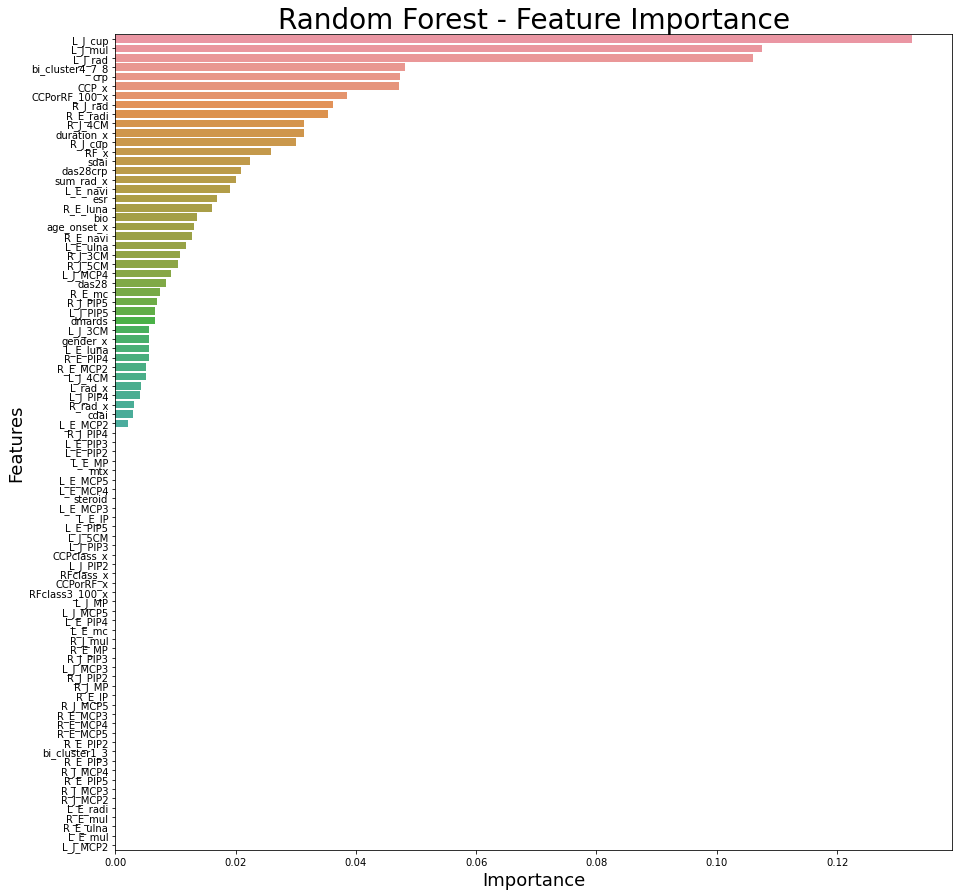

====evaluation for validation====
AUC	0.571
F1	0.154
auc [0.7002398081534772, 0.6261990407673863, 0.6566176470588236, 0.6524424480628861, 0.6892857142857144, 0.6633913531723751, 0.6870335820895522, 0.7294776119402984, 0.6107142857142858, 0.5714285714285714] 0.658683006267337
F1 [0.2807017543859649, 0.21538461538461542, 0.2857142857142857, 0.2692307692307692, 0.22580645161290322, 0.28571428571428575, 0.31884057971014496, 0.3582089552238805, 0.17391304347826086, 0.15384615384615385] 0.25673608943012644


In [3]:
df_exp = pd.read_csv(config['file_name'] + ".csv", sep=",") 
def main():
    print('-' * 20)
    for key in config:
        print('%s: %s' % (key, config[key]))
    print('-' * 20)
    print("objective variable: ", df_exp.columns[1])
    os.makedirs('./RF_weight_log/%s' % config['name'], exist_ok=True)
    
    with open('./RF_weight_log/%s/config.yml' % config['name'], 'w') as f:
        yaml.dump(config, f)
        
    columns_name = list(df_exp.columns)
    full_y = df_exp[columns_name[0:2]]
    full_X = df_exp.drop(columns_name[1], axis=1)

    auc_list=[]
    F1_list=[]
    for k in range(config['num_fold']): 

        # 1. read k fold data
        df_id_tr = pd.read_csv(config['id_dir'] + "/"+ f'{k}' + "/" + "id_tr.csv") 
        df_id_te = pd.read_csv(config['id_dir'] + "/"+ f'{k}' + "/" + "id_val.csv") 
        df_tr_X = pd.merge(df_id_tr, full_X, on=columns_name[0]).drop(columns_name[0], axis=1)
        df_tr_y = pd.merge(df_id_tr, full_y, on=columns_name[0]).drop(columns_name[0], axis=1)
        df_te_X = pd.merge(df_id_te, full_X, on=columns_name[0]).drop(columns_name[0], axis=1)
        df_te_y = pd.merge(df_id_te, full_y, on=columns_name[0]).drop(columns_name[0], axis=1)

        ss = preprocessing.StandardScaler()
        xtrain = ss.fit_transform(np.array(df_tr_X))      
        xtest = ss.fit_transform(np.array(df_te_X))  

        ttrain = np.array(df_tr_y).reshape(len(df_tr_y),) 
        ttest = np.array(df_te_y).reshape(len(df_te_y),) 

        # 2. learning, cross-validation
        diparameter={"n_estimators":eval(config['n_estimators']),
                     "class_weight":config['class_weight'],
                     "criterion":config['criterion'],
                     "max_depth":eval(config['max_depth']),
                     "random_state":config['random_state'],
                     "max_features":config['max_features'],
                     "min_samples_split":eval(config['min_samples_split']),
                     "max_leaf_nodes":eval(config['max_leaf_nodes'])}
        licv=sklearn.model_selection.GridSearchCV(RandomForestClassifier(),param_grid=diparameter,cv=config['num_fold'],n_jobs=-1)
        licv.fit(xtrain,ttrain.ravel())
        predictor=licv.best_estimator_
        joblib.dump(predictor,f'./RF_weight_log/%s/predictor{k}.pkl' % config['name'], compress=True)

        # 3. evaluating the performance indicator (acu and f1)
        liprediction=predictor.predict(xtrain)
        fpr, tpr, thresholds = roc_curve(ttrain,liprediction)
        
        Youden_index_candidates = tpr-fpr
        index = np.where(Youden_index_candidates==max(Youden_index_candidates))[0][0]
        cutoff = thresholds[index]
        cutoff_result = np.where(liprediction < cutoff, 0, 1)

        auc = roc_auc_score(ttrain,liprediction)
        f1 = f1_score(ttrain ,cutoff_result)
    
        print("====evaluation for training====")
        print("AUC\t{0:.3f}".format(auc))
        print("F1\t{0:.3f}".format(f1))

        # 4. printing parameters of the predictor
        print("====parameters of the predictor=====")
        print(sorted(predictor.get_params(True).items()))

        # 5. printing feature importance
        importance = predictor.feature_importances_.reshape(-1,1)
        print("====feature importance=====")

        fea_licv_imp = pd.DataFrame({'imp': predictor.feature_importances_, 'col': columns_name[2:len(columns_name)]})
        fea_licv_imp.to_csv(f'./RF_weight_log/%s/feat_imp_%s.csv' % (config['name'],k), index=False)
        fea_licv_imp = fea_licv_imp.sort_values(by='imp', ascending=False)
        print(fea_licv_imp)

        figure = plt.figure(figsize=(15, 15))
        sns.barplot('imp','col',data=fea_licv_imp,orient='h')
        plt.title('Random Forest - Feature Importance',fontsize=28)
        plt.ylabel('Features',fontsize=18)
        plt.xlabel('Importance',fontsize=18)
        plt.show()
        
        #6. Visualizing Decision Trees
        estimators = predictor
        viz=dtreeviz(
        estimators[1],xtrain,ttrain,
        target_name=df_exp.columns[1],
        feature_names=columns_name[2:len(columns_name)],
        class_names=["negative","positive"],
        ) 
        viz.save(f'./RF_weight_log/%s/dtreeviz{k}.svg' % config["name"])
        

        # 7. reading predictor
        predictor=joblib.load(f'./RF_weight_log/%s/predictor{k}.pkl'% config['name'])

        # 8. evaluating the performance of the predictor on the test dataset
        liprediction=predictor.predict(xtest)
        fpr, tpr, thresholds = roc_curve(ttest,liprediction)
        
        Youden_index_candidates = tpr-fpr
        index = np.where(Youden_index_candidates==max(Youden_index_candidates))[0][0]
        cutoff = thresholds[index]
        cutoff_result = np.where(liprediction < cutoff, 0, 1)

        auc = roc_auc_score(ttest,liprediction)
        f1 = f1_score(ttest ,cutoff_result)

        print("====evaluation for validation====")
        print("AUC\t{0:.3f}".format(auc))
        print("F1\t{0:.3f}".format(f1))
        
        auc_list.append(auc)
        F1_list.append(f1)
    print("auc", auc_list, statistics.mean(auc_list))    
    print("F1", F1_list, statistics.mean(F1_list)) 
    AUC = auc_list+[statistics.mean(auc_list)]
    F1 = F1_list+[statistics.mean(F1_list)]
    col_name=np.arange(1,k+2,1).tolist()+["mean"]
    AUC = pd.DataFrame(AUC).T.set_axis(['AUC'], axis=0).set_axis(col_name, axis=1)
    F1 = pd.DataFrame(F1).T.set_axis(['F1'], axis=0).set_axis(col_name, axis=1)
    stat = pd.concat([AUC,F1],axis=0)
    frame_name=pd.DataFrame(["RF_without_Boruta_summary_statics"])
    frame_name.to_csv(f'./RF_weight_log/%s/sumstat_test.csv' % config['name'],index=False, header=None)
    set_name=pd.DataFrame(["Cross validation"])
    set_name.to_csv(f'./RF_weight_log/%s/sumstat_test.csv' % config['name'], mode='a' ,index=False, header=None)
    stat.to_csv(f'./RF_weight_log/%s/sumstat_test.csv' % config['name'], mode='a')

if __name__ == '__main__':
     main()


# Boruta

In [4]:
def Boruta():
    columns_name = list(df_exp.columns)
    y = df_exp[df_exp.columns[1]]
    X = df_exp[columns_name[2:len(columns_name)]]
    ss = preprocessing.StandardScaler()
    X_norm= ss.fit_transform(X)
    rf = RandomForestClassifier(n_jobs=-1, max_depth=None, max_features = "auto", class_weight = 'balanced')
    feat_selector = BorutaPy(rf, n_estimators='auto', two_step=True, verbose=2, random_state=config['random_state'][0], max_iter=config['max_iter'], perc = config['perc'])

    feat_selector.fit(X_norm,y)
    X_train_selected = X_norm[:,feat_selector.support_]
    print("=====display of selected variables=====")
    print(X.iloc[:,feat_selector.support_].columns)
    set_name=pd.DataFrame(["Boruta"])
    set_name.to_csv(f'./RF_weight_log/%s/sumstat_test.csv' % config['name'], mode='a' ,index=False, header=None)
    select_col_list = X.iloc[:,feat_selector.support_].columns.tolist()
    select_col_name=pd.DataFrame(select_col_list).T.set_axis(['selected_columns'], axis=0)
    select_col_name.to_csv(f'./RF_weight_log/%s/sumstat_test.csv' % config['name'], mode='a' ,index=False, header=None)
    return X_train_selected, select_col_list

X_train_selected, select_col_list=Boruta()

Iteration: 	1 / 800
Confirmed: 	0
Tentative: 	87
Rejected: 	0
Iteration: 	2 / 800
Confirmed: 	0
Tentative: 	87
Rejected: 	0
Iteration: 	3 / 800
Confirmed: 	0
Tentative: 	87
Rejected: 	0
Iteration: 	4 / 800
Confirmed: 	0
Tentative: 	87
Rejected: 	0
Iteration: 	5 / 800
Confirmed: 	0
Tentative: 	87
Rejected: 	0
Iteration: 	6 / 800
Confirmed: 	0
Tentative: 	87
Rejected: 	0
Iteration: 	7 / 800
Confirmed: 	0
Tentative: 	87
Rejected: 	0
Iteration: 	8 / 800
Confirmed: 	28
Tentative: 	12
Rejected: 	47
Iteration: 	9 / 800
Confirmed: 	28
Tentative: 	12
Rejected: 	47
Iteration: 	10 / 800
Confirmed: 	28
Tentative: 	12
Rejected: 	47
Iteration: 	11 / 800
Confirmed: 	28
Tentative: 	12
Rejected: 	47
Iteration: 	12 / 800
Confirmed: 	28
Tentative: 	7
Rejected: 	52
Iteration: 	13 / 800
Confirmed: 	28
Tentative: 	7
Rejected: 	52
Iteration: 	14 / 800
Confirmed: 	28
Tentative: 	7
Rejected: 	52
Iteration: 	15 / 800
Confirmed: 	28
Tentative: 	7
Rejected: 	52
Iteration: 	16 / 800
Confirmed: 	28
Tentative: 	7
Re

====evaluation for training====
AUC	0.743
F1	0.312
====parameters of the predictor=====
[('bootstrap', True), ('ccp_alpha', 0.0), ('class_weight', 'balanced'), ('criterion', 'gini'), ('max_depth', 4), ('max_features', 'log2'), ('max_leaf_nodes', 5), ('max_samples', None), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 1), ('min_samples_split', 3), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 20), ('n_jobs', None), ('oob_score', False), ('random_state', 1), ('verbose', 0), ('warm_start', False)]
====feature importance=====
         imp              col
14  0.123446  bi_cluster4_7_8
8   0.114428          R_J_mul
0   0.111263          L_J_cup
20  0.103379             sdai
21  0.090731       duration_x
9   0.074550          R_J_rad
24  0.044156            CCP_x
25  0.041282             RF_x
13  0.036811         R_E_radi
1   0.034012          L_J_mul
16  0.031374         das28crp
18  0.028939              esr
17  0.028696              crp
7   0.022772          R_J_cup
12  0.017

C:\Users\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


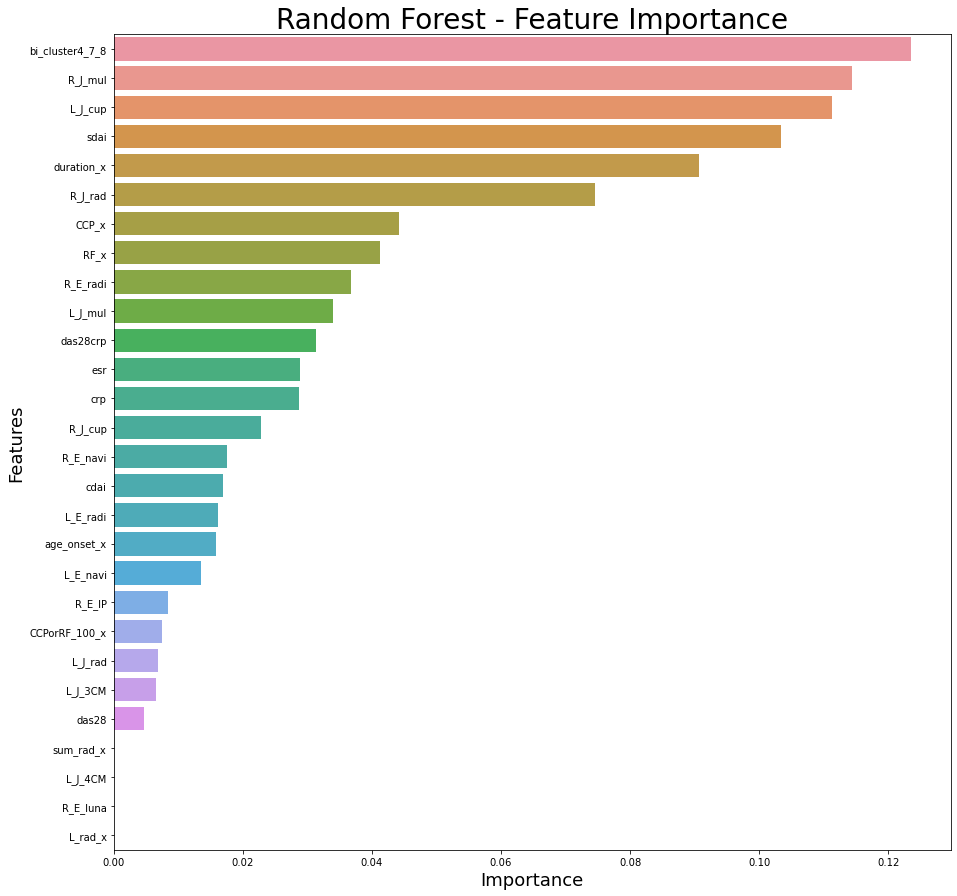

====evaluation for validation====
AUC	0.766
F1	0.312
====evaluation for training====
AUC	0.756
F1	0.342
====parameters of the predictor=====
[('bootstrap', True), ('ccp_alpha', 0.0), ('class_weight', 'balanced'), ('criterion', 'gini'), ('max_depth', 3), ('max_features', 'log2'), ('max_leaf_nodes', 5), ('max_samples', None), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 1), ('min_samples_split', 3), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 20), ('n_jobs', None), ('oob_score', False), ('random_state', 1), ('verbose', 0), ('warm_start', False)]
====feature importance=====
         imp              col
14  0.140322  bi_cluster4_7_8
0   0.135999          L_J_cup
20  0.079499             sdai
8   0.073738          R_J_mul
18  0.065943              esr
9   0.062613          R_J_rad
24  0.062076            CCP_x
1   0.051804          L_J_mul
13  0.048691         R_E_radi
21  0.041082       duration_x
12  0.038730         R_E_navi
7   0.032964          R_J_cup
17  0.031947    

C:\Users\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


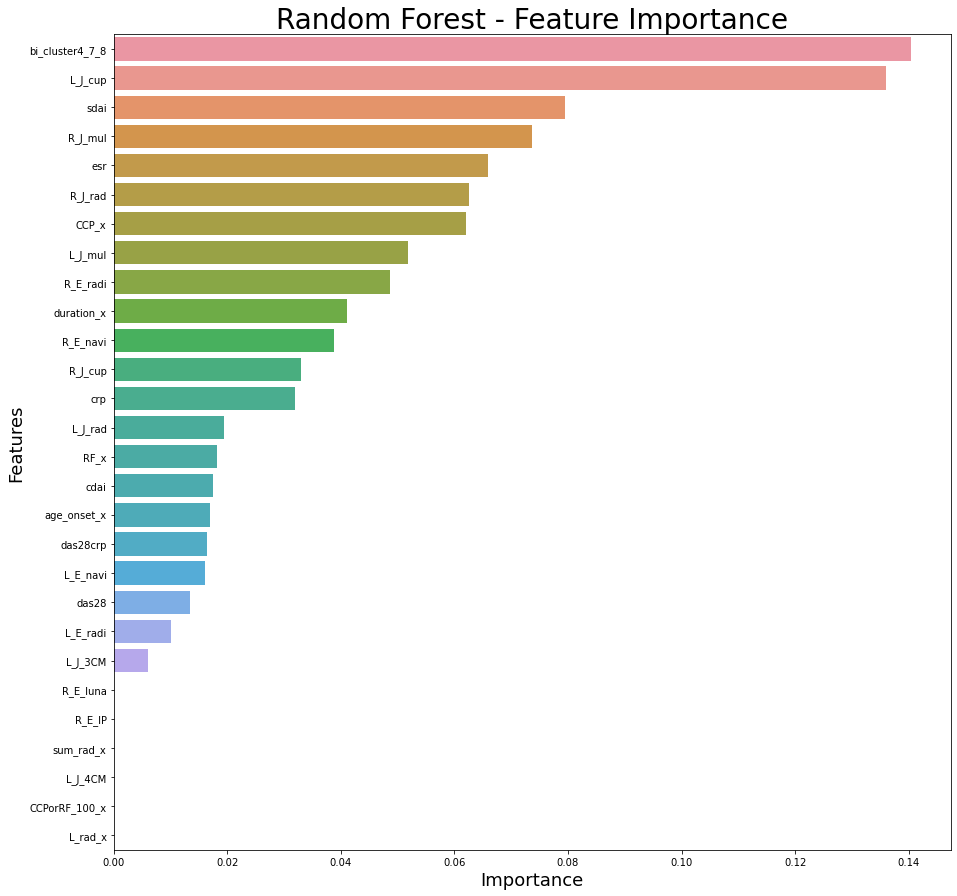

====evaluation for validation====
AUC	0.651
F1	0.241
====evaluation for training====
AUC	0.758
F1	0.325
====parameters of the predictor=====
[('bootstrap', True), ('ccp_alpha', 0.0), ('class_weight', 'balanced'), ('criterion', 'gini'), ('max_depth', 4), ('max_features', 'sqrt'), ('max_leaf_nodes', 5), ('max_samples', None), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 1), ('min_samples_split', 3), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 100), ('n_jobs', None), ('oob_score', False), ('random_state', 1), ('verbose', 0), ('warm_start', False)]
====feature importance=====
         imp              col
14  0.110482  bi_cluster4_7_8
1   0.091047          L_J_mul
7   0.084187          R_J_cup
0   0.082805          L_J_cup
13  0.064958         R_E_radi
8   0.063065          R_J_mul
15  0.052120            das28
18  0.040407              esr
24  0.039260            CCP_x
16  0.039141         das28crp
5   0.038373         L_E_navi
21  0.037900       duration_x
20  0.037302   

C:\Users\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


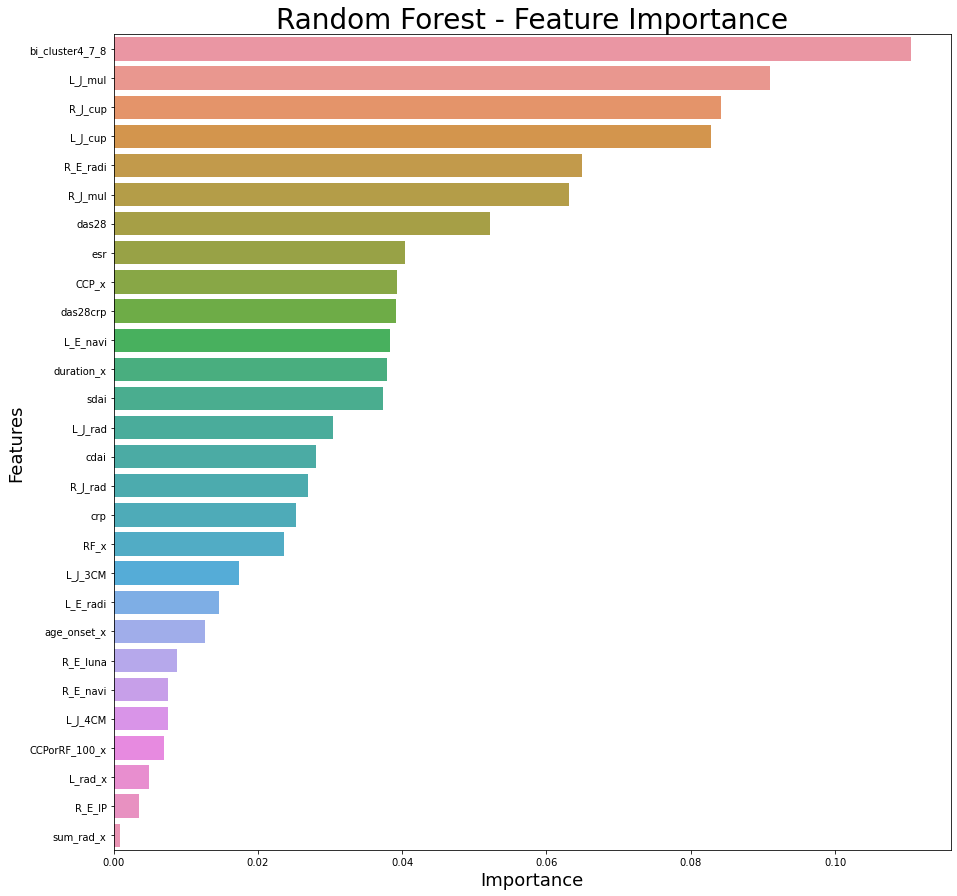

====evaluation for validation====
AUC	0.716
F1	0.351
====evaluation for training====
AUC	0.737
F1	0.321
====parameters of the predictor=====
[('bootstrap', True), ('ccp_alpha', 0.0), ('class_weight', 'balanced'), ('criterion', 'gini'), ('max_depth', 3), ('max_features', 'log2'), ('max_leaf_nodes', 5), ('max_samples', None), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 1), ('min_samples_split', 3), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 20), ('n_jobs', None), ('oob_score', False), ('random_state', 1), ('verbose', 0), ('warm_start', False)]
====feature importance=====
         imp              col
14  0.129801  bi_cluster4_7_8
0   0.085170          L_J_cup
8   0.071513          R_J_mul
7   0.070696          R_J_cup
20  0.067645             sdai
9   0.051462          R_J_rad
18  0.046596              esr
16  0.045815         das28crp
21  0.044255       duration_x
1   0.042769          L_J_mul
22  0.039503      age_onset_x
19  0.035699             cdai
13  0.034883    

C:\Users\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


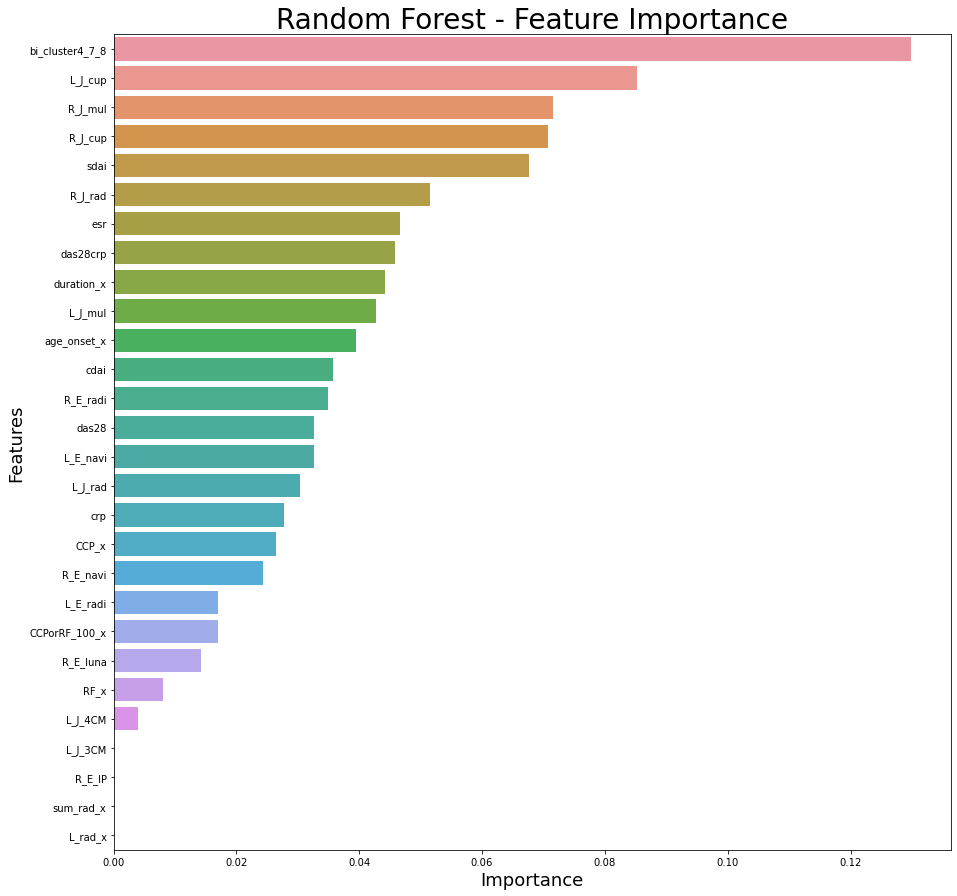

====evaluation for validation====
AUC	0.795
F1	0.373
====evaluation for training====
AUC	0.718
F1	0.287
====parameters of the predictor=====
[('bootstrap', True), ('ccp_alpha', 0.0), ('class_weight', 'balanced'), ('criterion', 'gini'), ('max_depth', 3), ('max_features', 'sqrt'), ('max_leaf_nodes', 5), ('max_samples', None), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 1), ('min_samples_split', 3), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 140), ('n_jobs', None), ('oob_score', False), ('random_state', 1), ('verbose', 0), ('warm_start', False)]
====feature importance=====
         imp              col
14  0.126980  bi_cluster4_7_8
1   0.100763          L_J_mul
0   0.098762          L_J_cup
7   0.077337          R_J_cup
8   0.077227          R_J_mul
18  0.056823              esr
21  0.049130       duration_x
9   0.048444          R_J_rad
15  0.042548            das28
13  0.036224         R_E_radi
2   0.035571          L_J_rad
20  0.031918             sdai
24  0.030127   

C:\Users\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


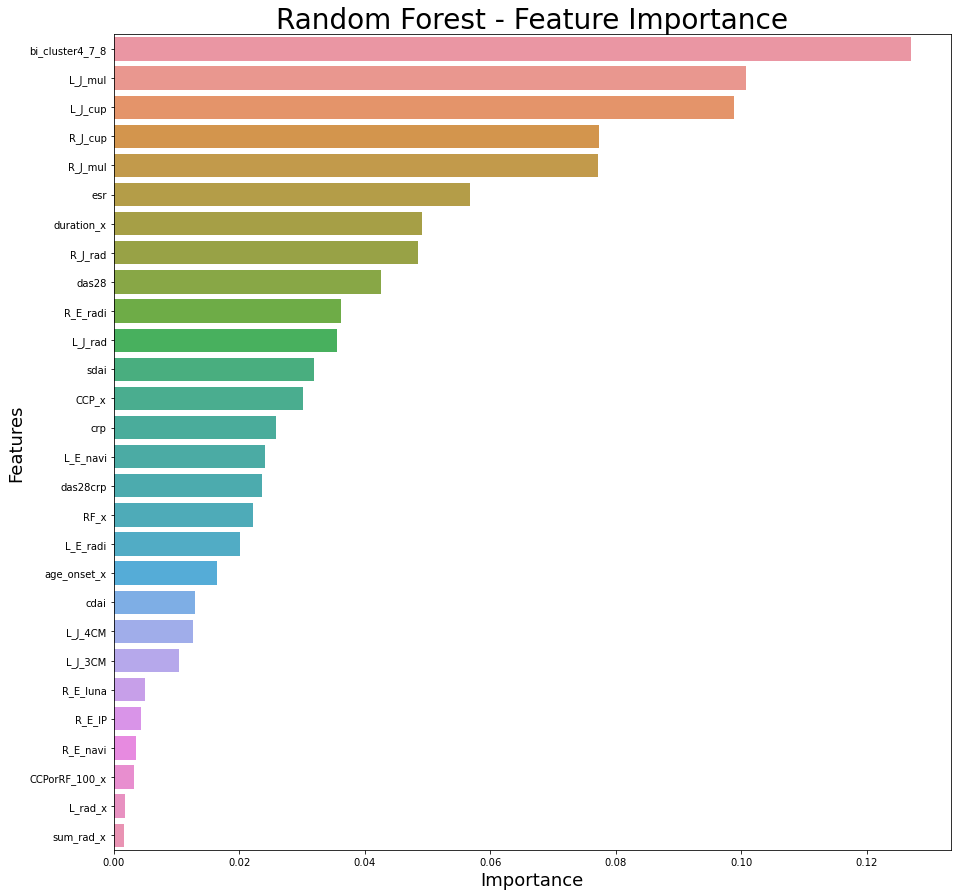

====evaluation for validation====
AUC	0.707
F1	0.222
====evaluation for training====
AUC	0.767
F1	0.332
====parameters of the predictor=====
[('bootstrap', True), ('ccp_alpha', 0.0), ('class_weight', 'balanced'), ('criterion', 'gini'), ('max_depth', 4), ('max_features', 'log2'), ('max_leaf_nodes', 5), ('max_samples', None), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 1), ('min_samples_split', 3), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 20), ('n_jobs', None), ('oob_score', False), ('random_state', 1), ('verbose', 0), ('warm_start', False)]
====feature importance=====
         imp              col
14  0.119145  bi_cluster4_7_8
0   0.107787          L_J_cup
8   0.099275          R_J_mul
13  0.059121         R_E_radi
1   0.054704          L_J_mul
18  0.049342              esr
25  0.047481             RF_x
2   0.046101          L_J_rad
15  0.044457            das28
16  0.043683         das28crp
9   0.042974          R_J_rad
17  0.034560              crp
20  0.034312    

C:\Users\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


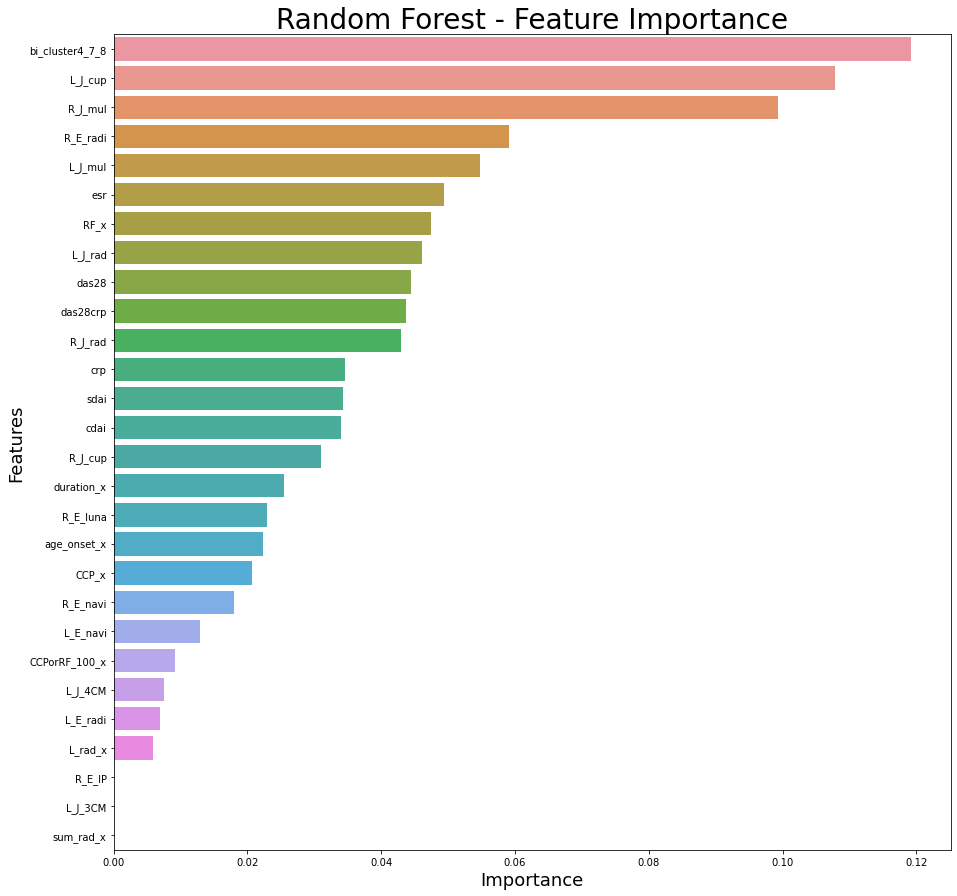

====evaluation for validation====
AUC	0.652
F1	0.269
====evaluation for training====
AUC	0.739
F1	0.314
====parameters of the predictor=====
[('bootstrap', True), ('ccp_alpha', 0.0), ('class_weight', 'balanced'), ('criterion', 'gini'), ('max_depth', 3), ('max_features', 'log2'), ('max_leaf_nodes', 5), ('max_samples', None), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 1), ('min_samples_split', 3), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 20), ('n_jobs', None), ('oob_score', False), ('random_state', 1), ('verbose', 0), ('warm_start', False)]
====feature importance=====
         imp              col
14  0.169376  bi_cluster4_7_8
0   0.123980          L_J_cup
25  0.087565             RF_x
20  0.079438             sdai
21  0.076925       duration_x
9   0.046478          R_J_rad
1   0.044642          L_J_mul
18  0.040552              esr
8   0.038537          R_J_mul
16  0.038136         das28crp
13  0.035450         R_E_radi
17  0.034750              crp
24  0.033662    

C:\Users\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


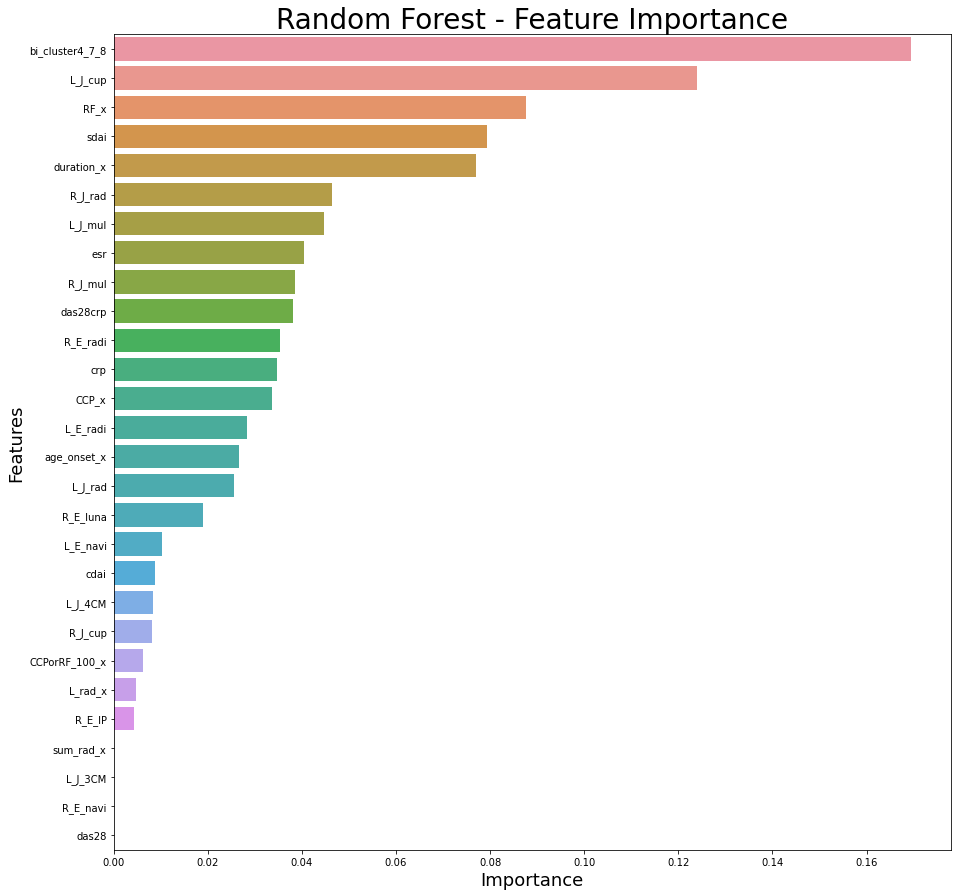

====evaluation for validation====
AUC	0.748
F1	0.387
====evaluation for training====
AUC	0.724
F1	0.288
====parameters of the predictor=====
[('bootstrap', True), ('ccp_alpha', 0.0), ('class_weight', 'balanced'), ('criterion', 'gini'), ('max_depth', 4), ('max_features', 'log2'), ('max_leaf_nodes', 5), ('max_samples', None), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 1), ('min_samples_split', 4), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 20), ('n_jobs', None), ('oob_score', False), ('random_state', 1), ('verbose', 0), ('warm_start', False)]
====feature importance=====
         imp              col
8   0.141321          R_J_mul
14  0.132652  bi_cluster4_7_8
0   0.089696          L_J_cup
20  0.086466             sdai
21  0.061131       duration_x
1   0.046790          L_J_mul
13  0.041261         R_E_radi
9   0.039138          R_J_rad
2   0.036836          L_J_rad
24  0.035609            CCP_x
15  0.035002            das28
18  0.031001              esr
25  0.030365    

C:\Users\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


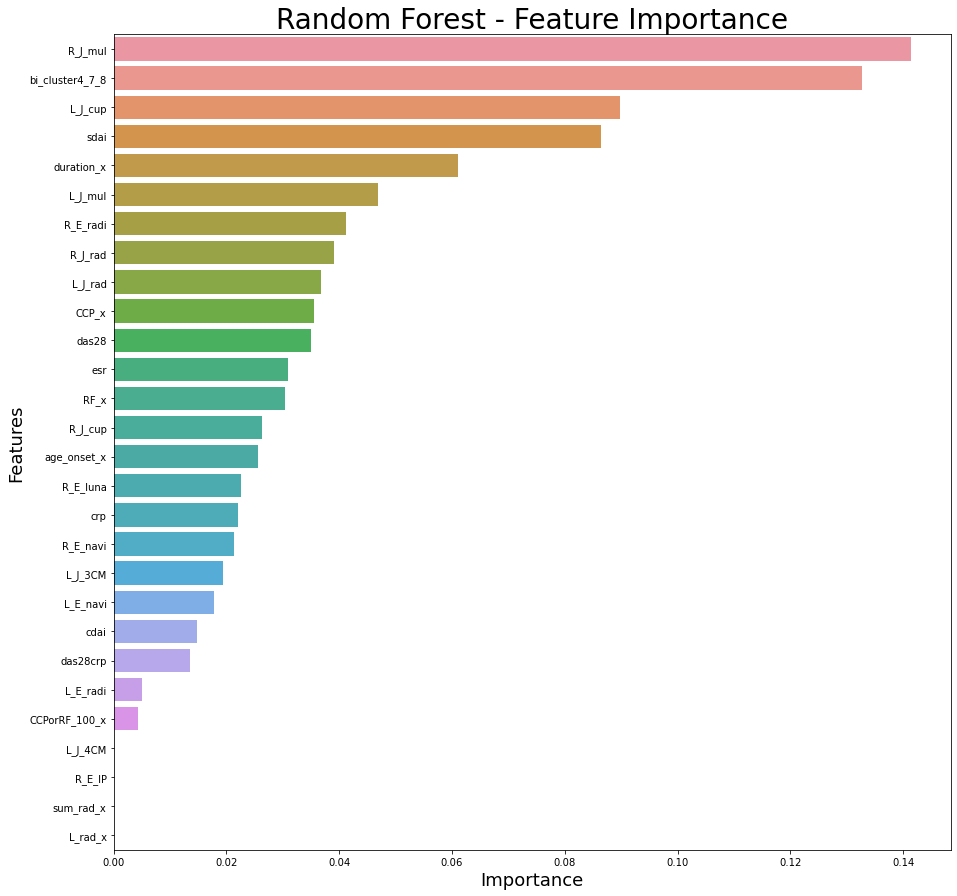

====evaluation for validation====
AUC	0.783
F1	0.419
====evaluation for training====
AUC	0.732
F1	0.303
====parameters of the predictor=====
[('bootstrap', True), ('ccp_alpha', 0.0), ('class_weight', 'balanced'), ('criterion', 'gini'), ('max_depth', 3), ('max_features', 'log2'), ('max_leaf_nodes', 5), ('max_samples', None), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 1), ('min_samples_split', 3), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 20), ('n_jobs', None), ('oob_score', False), ('random_state', 1), ('verbose', 0), ('warm_start', False)]
====feature importance=====
         imp              col
14  0.147139  bi_cluster4_7_8
0   0.109301          L_J_cup
7   0.102136          R_J_cup
20  0.094558             sdai
1   0.085871          L_J_mul
21  0.079118       duration_x
8   0.070123          R_J_mul
13  0.050447         R_E_radi
9   0.031889          R_J_rad
2   0.031781          L_J_rad
6   0.023668         L_E_radi
5   0.023289         L_E_navi
24  0.016285    

C:\Users\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


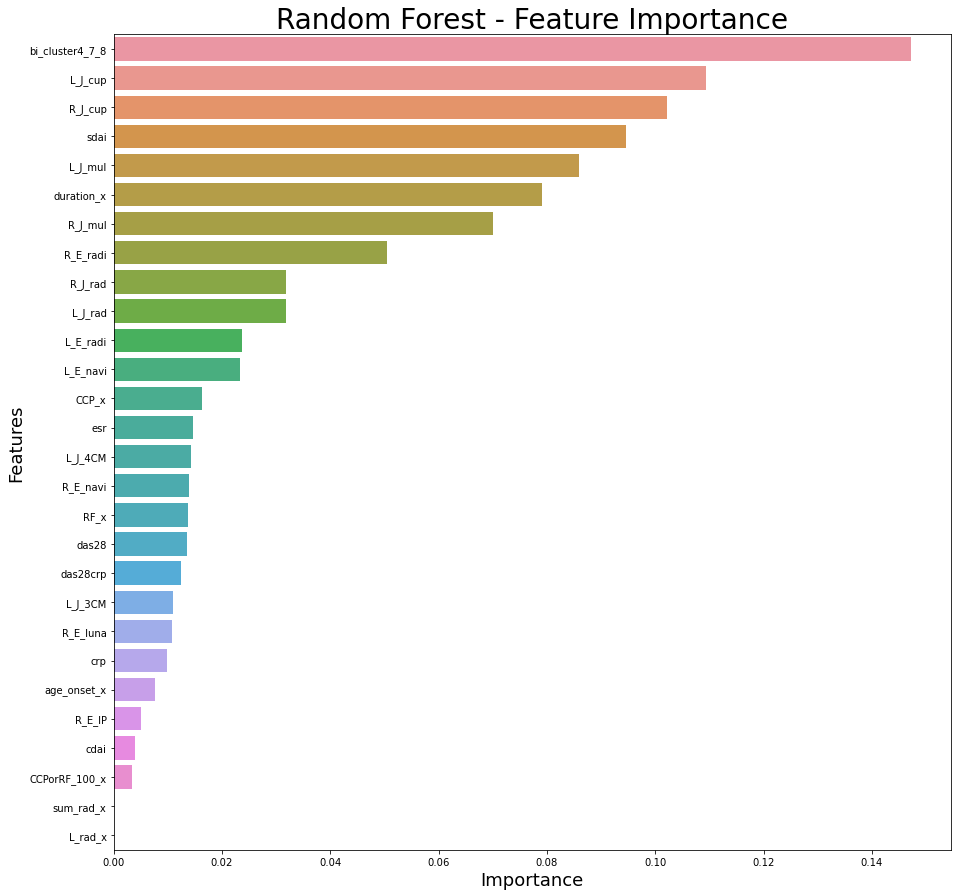

====evaluation for validation====
AUC	0.600
F1	0.167
====evaluation for training====
AUC	0.731
F1	0.293
====parameters of the predictor=====
[('bootstrap', True), ('ccp_alpha', 0.0), ('class_weight', 'balanced'), ('criterion', 'gini'), ('max_depth', 3), ('max_features', 'sqrt'), ('max_leaf_nodes', 5), ('max_samples', None), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 1), ('min_samples_split', 3), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 60), ('n_jobs', None), ('oob_score', False), ('random_state', 1), ('verbose', 0), ('warm_start', False)]
====feature importance=====
         imp              col
14  0.164224  bi_cluster4_7_8
1   0.110878          L_J_mul
7   0.094520          R_J_cup
0   0.069416          L_J_cup
8   0.068998          R_J_mul
5   0.053976         L_E_navi
9   0.053948          R_J_rad
13  0.044615         R_E_radi
21  0.036466       duration_x
20  0.032177             sdai
25  0.030448             RF_x
15  0.030197            das28
24  0.025858    

C:\Users\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


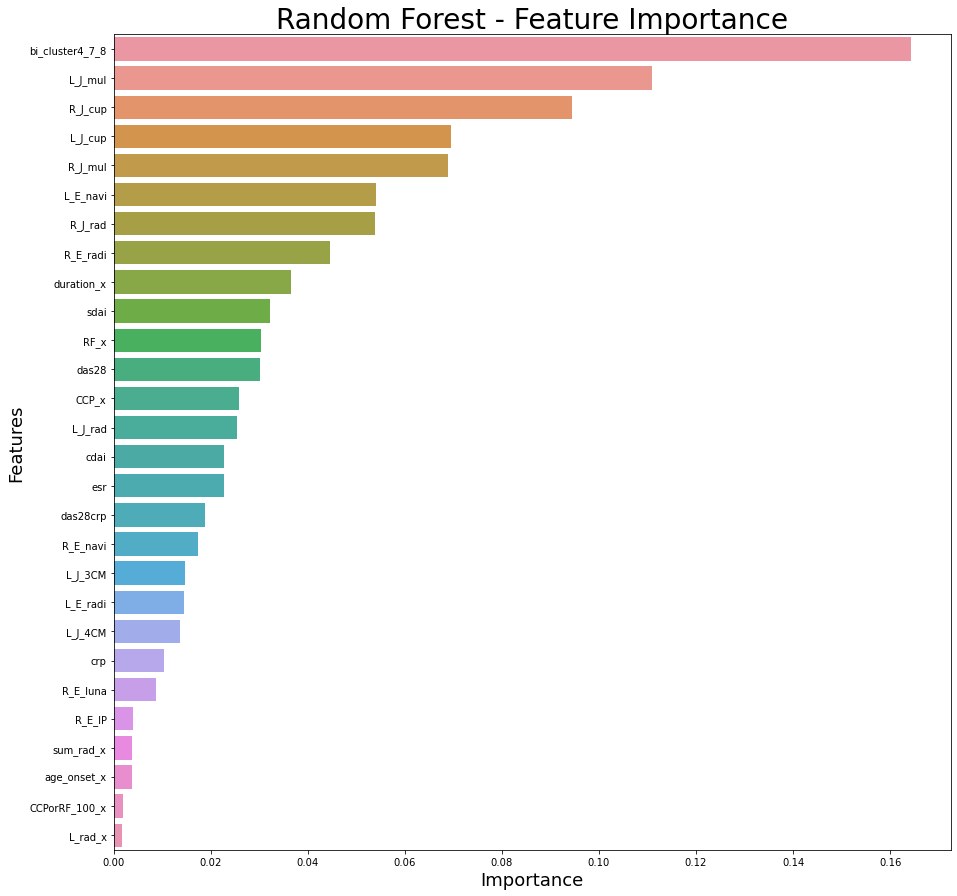

====evaluation for validation====
AUC	0.671
F1	0.195
auc [0.7655875299760192, 0.6513788968824941, 0.7156862745098038, 0.7953396967995509, 0.7071428571428573, 0.6524424480628861, 0.7481343283582089, 0.7831156716417911, 0.6, 0.6714285714285715] 0.7090256274802182
F1 [0.3125, 0.2413793103448276, 0.3508771929824562, 0.3728813559322034, 0.2222222222222222, 0.2692307692307692, 0.3870967741935483, 0.41935483870967744, 0.16666666666666666, 0.19512195121951217] 0.2937331081501883


In [5]:
def main():
    columns_name = list(df_exp.columns)
    full_y = df_exp[columns_name[0:2]]
    full_X = df_exp[[columns_name[0]] + select_col_list]

    auc_list=[]
    F1_list=[]
    for k in range(config['num_fold']):        
        # 1. read k fold data
        df_id_tr = pd.read_csv(config['id_dir'] + "/"+ f'{k}' + "/" + "id_tr.csv") 
        df_id_te = pd.read_csv(config['id_dir'] + "/"+ f'{k}' + "/" + "id_val.csv") 
        df_tr_X = pd.merge(df_id_tr, full_X, on=columns_name[0]).drop(columns_name[0], axis=1)
        df_tr_y = pd.merge(df_id_tr, full_y, on=columns_name[0]).drop(columns_name[0], axis=1)
        df_te_X = pd.merge(df_id_te, full_X, on=columns_name[0]).drop(columns_name[0], axis=1)
        df_te_y = pd.merge(df_id_te, full_y, on=columns_name[0]).drop(columns_name[0], axis=1)

        ss = preprocessing.StandardScaler()
        xtrain = ss.fit_transform(np.array(df_tr_X))      
        xtest = ss.fit_transform(np.array(df_te_X))  
        ttrain = np.array(df_tr_y).reshape(len(df_tr_y),) 
        ttest = np.array(df_te_y).reshape(len(df_te_y),)         

        # 2. learning, cross-validation
        diparameter={"n_estimators":eval(config['n_estimators']),
                     "class_weight":config['class_weight'],
                     "criterion":config['criterion'],
                     "max_depth":eval(config['max_depth']),
                     "random_state":config['random_state'],
                     "max_features":config['max_features'],
                     "min_samples_split":eval(config['min_samples_split']),
                     "max_leaf_nodes":eval(config['max_leaf_nodes'])}
        licv=sklearn.model_selection.GridSearchCV(RandomForestClassifier(),param_grid=diparameter,cv=config['num_fold'],n_jobs=-1)
        licv.fit(xtrain,ttrain)
        predictor=licv.best_estimator_
        joblib.dump(predictor,f'./RF_weight_log/%s/predictor_Boruta{k}.pkl' % config['name'],compress=True)

        # 3. evaluating the performance indicator
        liprediction=predictor.predict(xtrain)
        fpr, tpr, thresholds = roc_curve(ttrain,liprediction)
        
        Youden_index_candidates = tpr-fpr
        index = np.where(Youden_index_candidates==max(Youden_index_candidates))[0][0]
        cutoff = thresholds[index]
        cutoff_result = np.where(liprediction < cutoff, 0, 1)

        auc = roc_auc_score(ttrain,liprediction)
        f1 = f1_score(ttrain ,cutoff_result)
    
        print("====evaluation for training====")
        print("AUC\t{0:.3f}".format(auc))
        print("F1\t{0:.3f}".format(f1))

        # 4. printing parameters of the predictor
        print("====parameters of the predictor=====")
        print(sorted(predictor.get_params(True).items()))

        # 5. printing feature importance
        importance = predictor.feature_importances_.reshape(-1,1)
        print("====feature importance=====")

        fea_licv_imp = pd.DataFrame({'imp': predictor.feature_importances_, 'col': select_col_list})
        fea_licv_imp.to_csv(f'./RF_weight_log/%s/feat_imp_Boruta_%s.csv' % (config['name'],k), index=False)
        fea_licv_imp = fea_licv_imp.sort_values(by='imp', ascending=False)
        print(fea_licv_imp)
        
        figure = plt.figure(figsize=(15, 15))
        sns.barplot('imp','col',data=fea_licv_imp,orient='h')
        plt.title('Random Forest - Feature Importance',fontsize=28)
        plt.ylabel('Features',fontsize=18)
        plt.xlabel('Importance',fontsize=18)
        plt.show()
        
        #6. Visualizing Decision Trees
        estimators = predictor
        viz=dtreeviz(
        estimators[1],xtrain,ttrain,
        target_name=df_exp.columns[1],
        feature_names=select_col_list,
        class_names=["negative","positive"],
        ) 
        viz.save(f'./RF_weight_log/%s/dtreeviz_Boruta{k}.svg' % config["name"])

        # 7. reading predictor
        predictor=joblib.load(f'./RF_weight_log/%s/predictor_Boruta{k}.pkl' % config['name'])

        # 8. evaluating the performance of the predictor on the test dataset
        liprediction=predictor.predict(xtest)
        fpr, tpr, thresholds = roc_curve(ttest,liprediction)
        
        Youden_index_candidates = tpr-fpr
        index = np.where(Youden_index_candidates==max(Youden_index_candidates))[0][0]
        cutoff = thresholds[index]
        cutoff_result = np.where(liprediction < cutoff, 0, 1)

        auc = roc_auc_score(ttest,liprediction)
        f1 = f1_score(ttest ,cutoff_result)

        print("====evaluation for validation====")
        print("AUC\t{0:.3f}".format(auc))
        print("F1\t{0:.3f}".format(f1))
        
        auc_list.append(auc)
        F1_list.append(f1)
        
    print("auc", auc_list, statistics.mean(auc_list))    
    print("F1", F1_list, statistics.mean(F1_list)) 
    AUC = auc_list+[statistics.mean(auc_list)]
    F1 = F1_list+[statistics.mean(F1_list)]
    col_name=np.arange(1,k+2,1).tolist()+["mean"]
    AUC = pd.DataFrame(AUC).T.set_axis(['AUC'], axis=0).set_axis(col_name, axis=1)
    F1 = pd.DataFrame(F1).T.set_axis(['F1'], axis=0).set_axis(col_name, axis=1)
    stat = pd.concat([AUC,F1],axis=0)
    frame_name=pd.DataFrame(["RF_with_Boruta_summary_statics"])
    frame_name.to_csv(f'./RF_weight_log/%s/sumstat_test.csv' % config['name'], mode='a', index=False, header=None)
    set_name=pd.DataFrame(["Cross validation"])
    set_name.to_csv(f'./RF_weight_log/%s/sumstat_test.csv' % config['name'], mode='a' ,index=False, header=None)
    stat.to_csv(f'./RF_weight_log/%s/sumstat_test.csv' % config['name'], mode='a')
if __name__ == '__main__':
    main()

         col      mean
9    L_J_cup  0.108126
10   L_J_mul  0.098146
11   L_J_rad  0.086065
66       crp  0.054071
42   R_J_rad  0.049419
..       ...       ...
18  L_E_MCP4  0.000000
24  L_E_PIP5  0.000000
52  R_E_PIP2  0.000000
31  R_J_MCP2  0.000000
22  L_E_PIP3  0.000000

[87 rows x 2 columns]


C:\Users\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


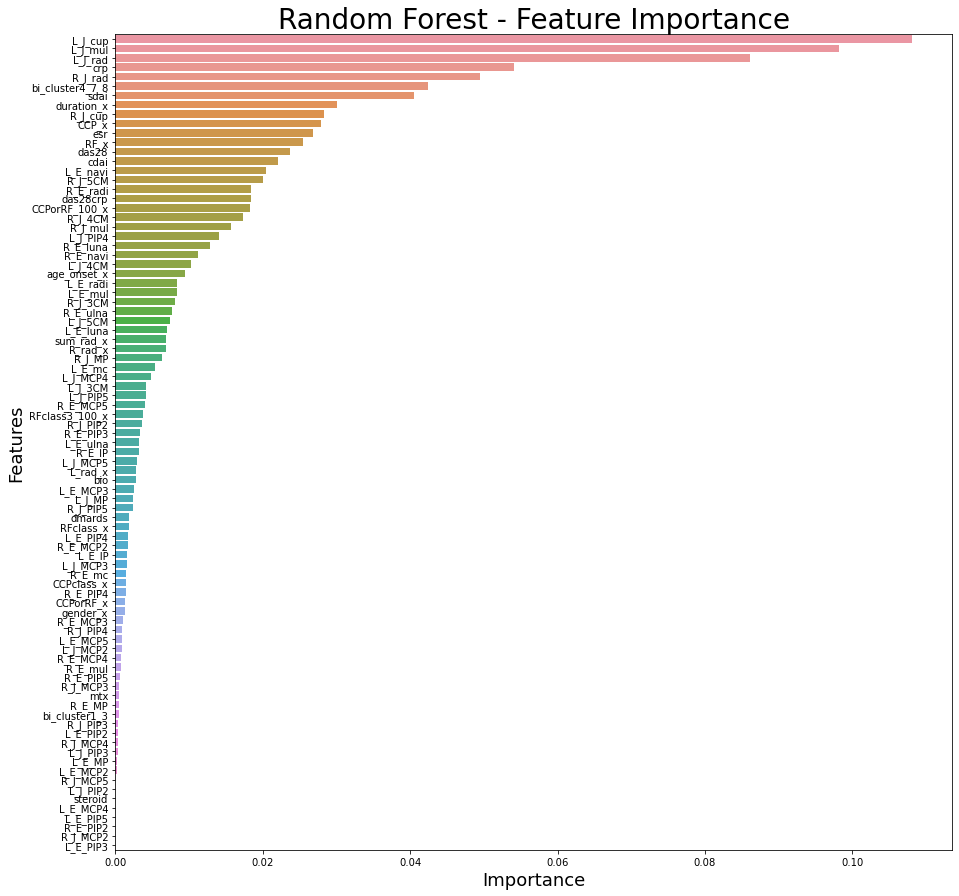

In [6]:
#mean feature importance from RandomForest without Boruta
for k in range(config['num_fold']):
    if k == 0:
        feat_df0 = pd.read_csv(f'./RF_weight_log/%s/feat_imp_%s.csv' % (config['name'],k))
        feat_df0 = feat_df0.set_index('col')
    else:
        feat_df = pd.read_csv(f'./RF_weight_log/%s/feat_imp_%s.csv' % (config['name'],k))
        feat_df = feat_df.set_index('col')
        feat_df0 = pd.concat([feat_df0, feat_df], axis=1)
all_feat_imp_mean = feat_df0.T.describe().iloc[1,0:].reset_index()
all_feat_imp_mean = all_feat_imp_mean.sort_values('mean', ascending=False)
print(all_feat_imp_mean)
figure = plt.figure(figsize=(15, 15))
sns.barplot('mean','col',data=all_feat_imp_mean,orient='h')
plt.title('Random Forest - Feature Importance',fontsize=28)
plt.ylabel('Features',fontsize=18)
plt.xlabel('Importance',fontsize=18)
plt.show()

                col      mean
14  bi_cluster4_7_8  0.136357
0           L_J_cup  0.101418
8           R_J_mul  0.081823
1           L_J_mul  0.066328
20             sdai  0.064669
7           R_J_cup  0.055025
21       duration_x  0.054223
9           R_J_rad  0.047847
13         R_E_radi  0.045246
18              esr  0.039688
24            CCP_x  0.033416
25             RF_x  0.032268
2           L_J_rad  0.028831
16         das28crp  0.028312
15            das28  0.026885
17              crp  0.025128
5          L_E_navi  0.024302
19             cdai  0.019542
22      age_onset_x  0.018749
12         R_E_navi  0.016238
6          L_E_radi  0.015641
11         R_E_luna  0.011193
3           L_J_3CM  0.008574
4           L_J_4CM  0.006800
26    CCPorRF_100_x  0.005996
10           R_E_IP  0.002966
27          L_rad_x  0.001905
23        sum_rad_x  0.000631


C:\Users\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


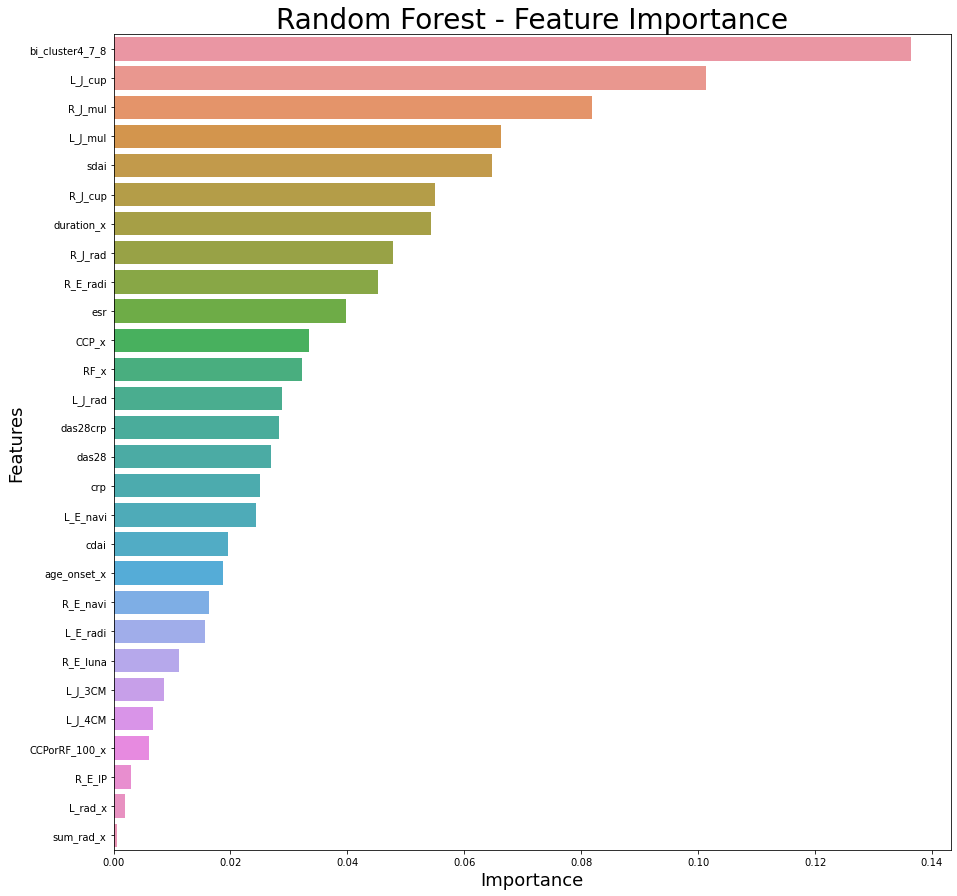

In [7]:
#mean feature importance from RandomForest with Boruta
for k in range(config['num_fold']):
    if k == 0:
        feat_df0 = pd.read_csv(f'./RF_weight_log/%s/feat_imp_Boruta_%s.csv' % (config['name'],k))
        feat_df0 = feat_df0.set_index('col')
    else:
        feat_df = pd.read_csv(f'./RF_weight_log/%s/feat_imp_Boruta_%s.csv' % (config['name'],k))
        feat_df = feat_df.set_index('col')
        feat_df0 = pd.concat([feat_df0, feat_df], axis=1)
all_feat_imp_mean = feat_df0.T.describe().iloc[1,0:].reset_index()
all_feat_imp_mean = all_feat_imp_mean.sort_values('mean', ascending=False)
print(all_feat_imp_mean)
figure = plt.figure(figsize=(15, 15))
sns.barplot('mean','col',data=all_feat_imp_mean,orient='h')
plt.title('Random Forest - Feature Importance',fontsize=28)
plt.ylabel('Features',fontsize=18)
plt.xlabel('Importance',fontsize=18)
plt.show()